In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [12]:
data_train_path = 'train'
data_test_path = 'test'
data_val_path = 'validation'

In [13]:
img_width = 180
img_height =180 

In [14]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [15]:
data_cat = data_train.class_names

In [16]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [17]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [18]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 287 files belonging to 36 classes.


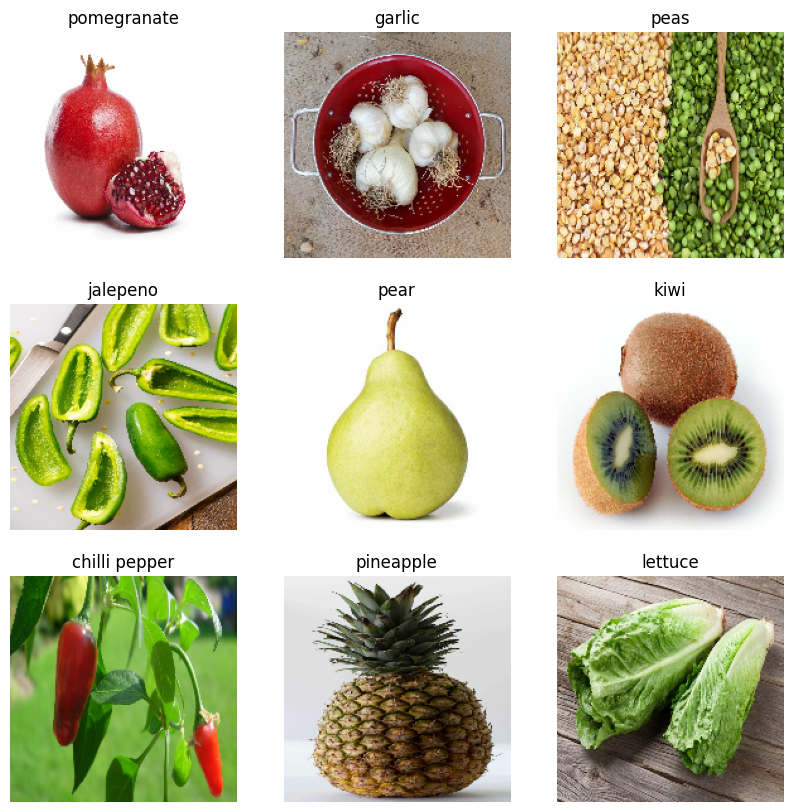

In [19]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [23]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [24]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 186ms/step - accuracy: 0.0825 - loss: 3.4670 - val_accuracy: 0.2507 - val_loss: 2.6518
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.2758 - loss: 2.5147 - val_accuracy: 0.5499 - val_loss: 1.6835
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.4578 - loss: 1.8498 - val_accuracy: 0.7379 - val_loss: 0.9840
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - accuracy: 0.6549 - loss: 1.1998 - val_accuracy: 0.8405 - val_loss: 0.6761
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - accuracy: 0.7904 - loss: 0.7247 - val_accuracy: 0.9003 - val_loss: 0.5037
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.8562 - loss: 0.4999 - val_accuracy: 0.9231 - val_loss: 0.4666
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.9108 - loss: 0.3519 - val_accuracy: 0.9430 - val_loss: 0.4162
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - accuracy: 0.9384 - loss: 0.2523 - val_accu

Text(0.5, 1.0, 'Loss')

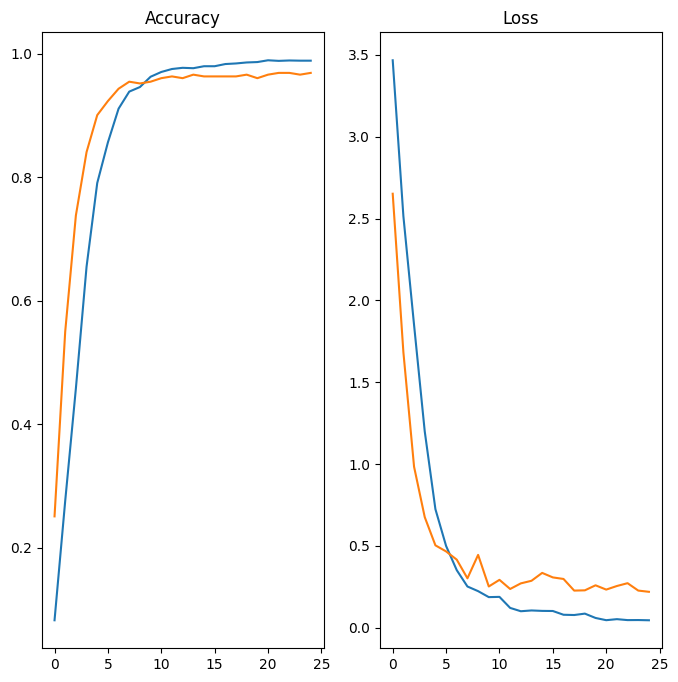

In [25]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [31]:
image = 'test/corn/corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [32]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [33]:
score = tf.nn.softmax(predict)

In [34]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 83.95


In [35]:
model.save('Image_classify.keras')